## Changing from the World Frame to the Camera Frame


We want to discover what is the transformation that can convert coordinates in the World Frame into coordinates in the Camera Frame.

> P_cam = ??????? P_world


Considering that the camera has been rotated and translated in the World Frame as:


> Cam_new = T . R . Cam_ini



Besides moving the camera, the transformation M = T.R can be used to convert coordinates represented in the Camera Frame (P_cam) to coordinates represented in the World Frame (P_world)

> P_world = M_cam->world . P_cam

> P_world = M . P_cam


To do the other way around, we have to invert M:

> P_cam = inv(M_cam->world) . P_world

> P_cam = inv(M) . P_world

> M_world->cam = inv(M_cam->world)


Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
Camera: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


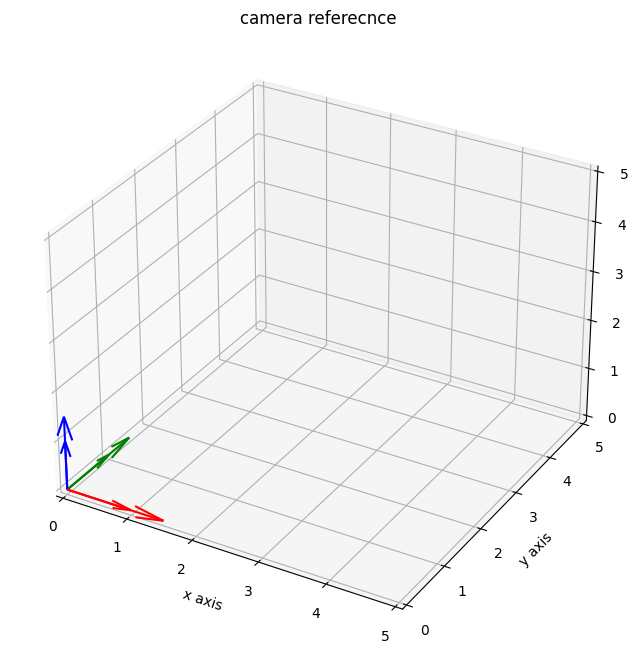

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
from math import pi,cos,sin

def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

def translation(dx,dy,dz):
    t = np.array([dx,dy,dz,1])
    T = np.eye(4)
    T[:,-1]=t.T
    return T


def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix


# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point =np.array([[0],[0],[0],[1]])

print ('Origin: \n',point)

# Camera frame
# You can also consider the camera as an object composed by its base and origin
# Then you can transform such object whenever you want to rotate or translate the camera
cam  = np.hstack([base,point])

print ('Camera: \n',cam)

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[0,5])
axis = draw_arrows(point,base,axis)


######################
# Camera reference frame plotted at the origin
axis = draw_arrows(cam[:,3],cam[:,0:3],axis,length=1.0)



translation: 
 [[1. 0. 0. 1.]
 [0. 1. 0. 3.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]]
rotation: 
 [[ 0. -1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
rotation: 
 [[ 1.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]
Transformation Matrix: 
 [[ 0. -1.  0.  1.]
 [ 0.  0. -1.  3.]
 [ 1.  0.  0.  4.]
 [ 0.  0.  0.  1.]]
Camera frame vectors: 
 [[ 0. -1.  0.  1.]
 [ 0.  0. -1.  3.]
 [ 1.  0.  0.  4.]
 [ 0.  0.  0.  1.]]


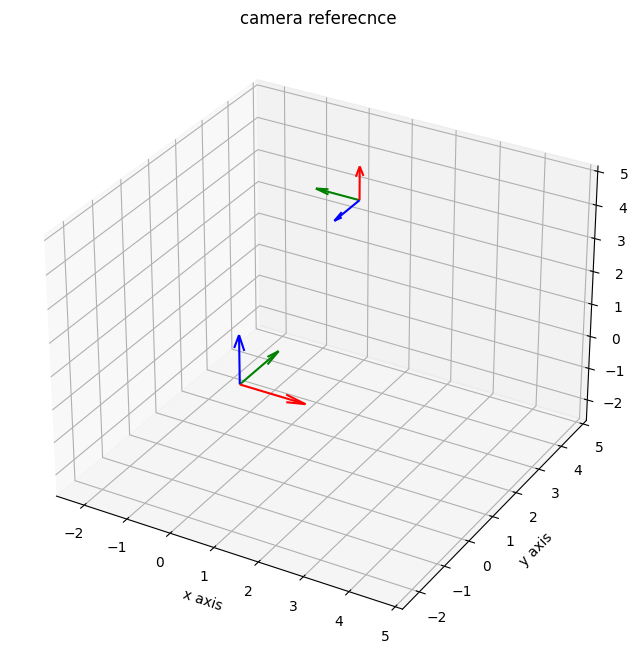

In [ ]:


######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)
#######################

# Translation and rotation of the camera reference frame

T1 = translation (1,3,4)
print("translation: \n",T1)
R1 = z_rotation (pi/2)
print("rotation: \n", R1)

R2 = x_rotation (pi/2)
print("rotation: \n", R2)

# Calculating the whole transformation M = T1.R2.R1
M = np.dot(R2,R1)
M = np.dot(T1,M)
print("Transformation Matrix: \n", M)


# Moving the camera origin
new_cam = np.dot(M,cam)

#Note that:
#base_newcam = new_cam[:,0:3]
#orig_newcam = new_cam[:,3]

print("Camera frame vectors: \n", new_cam)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)


3D point in the Worl Frame: 
 [[3.]
 [3.]
 [3.]
 [1.]]
Point coordinates in the world frame: 
 [[3.]
 [3.]
 [3.]
 [1.]]
Point coordinates in the camera frame: 
 [[-1.]
 [-2.]
 [-0.]
 [ 1.]]


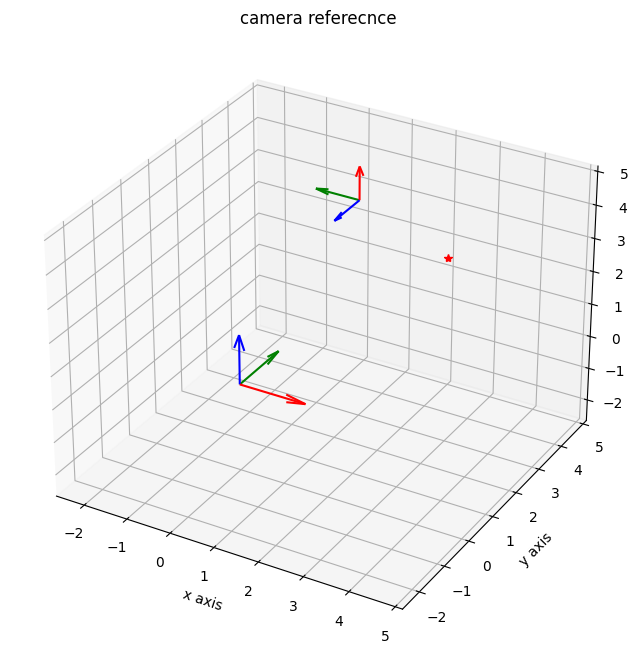

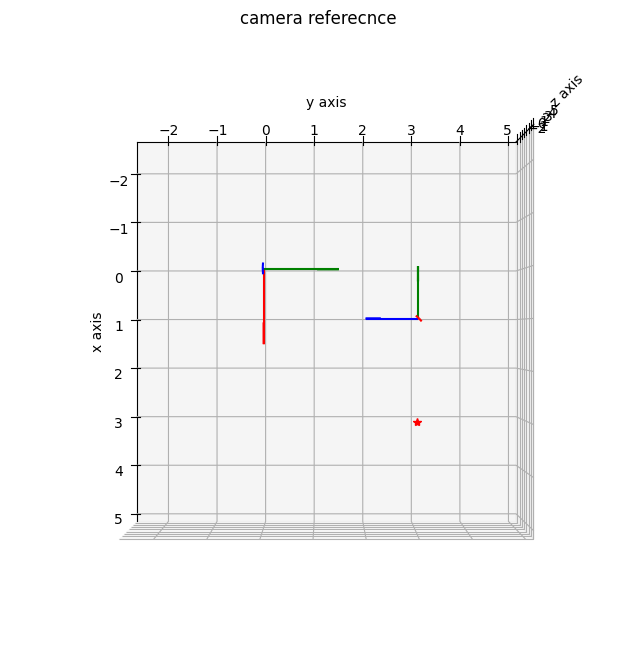

In [ ]:
######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)
#######################

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

# A 3D point to be represented in the world and camera coodinate systems
# Point coordinates in the world frame
point_obs = np.array([[3.0],[3.0],[3.0],[1.0]])
print("3D point in the Worl Frame: \n", point_obs)

axis.plot3D(point_obs[0,:],point_obs[1,:],point_obs[2,:],'*r')

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)
#######################

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

axis.plot3D(point_obs[0,:],point_obs[1,:],point_obs[2,:],'*r')
axis.view_init(elev=90, azim=0)

# Functions for tranformation between the Camera Frame and the World Frame, and vice-versa
# P_world = M*P_cam where M represents the rotation and translation applied to the Camera Frame
# when moving the camera in the World Frame
# M also represesnts the transformation that converts coordinates from the camera frame to the world frame

def change_cam2world (M,point_cam):
      #Convert from camera frame to world frame
      p_world = np.dot(M,point_cam)
      return p_world

def change_world2cam (M,point_world):
      #Convert from world frame to camera frame
      M_inv = np.linalg.inv(M)
      p_cam = np.dot(M_inv,point_world)
      return p_cam


point_obs_cam = change_world2cam(M,point_obs)




print("Point coordinates in the world frame: \n", point_obs)
print("Point coordinates in the camera frame: \n", point_obs_cam)



[[0]
 [3]
 [0]
 [1]]
[[-2.]
 [ 3.]
 [ 4.]
 [ 1.]]
[[-2.]
 [ 3.]
 [ 4.]
 [ 1.]]
3D point in the Camera Frame: 
 [[0]
 [3]
 [0]
 [1]]
3D point in the World Frame: 
 [[-2.]
 [ 3.]
 [ 4.]
 [ 1.]]


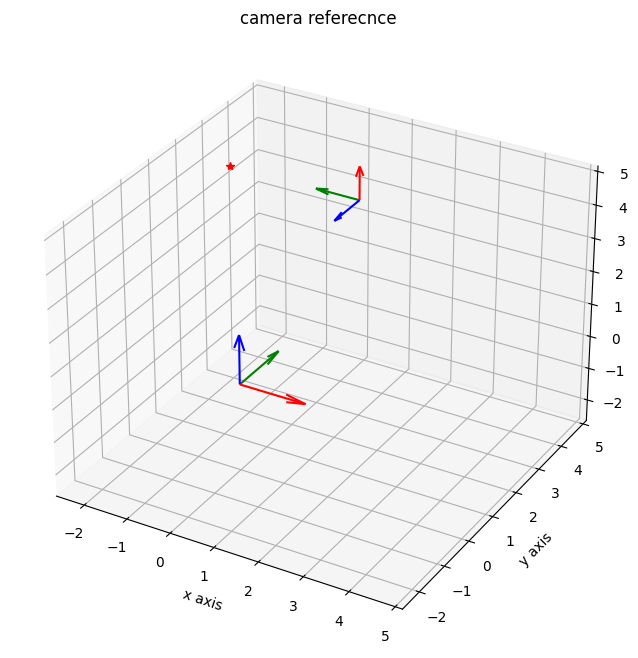

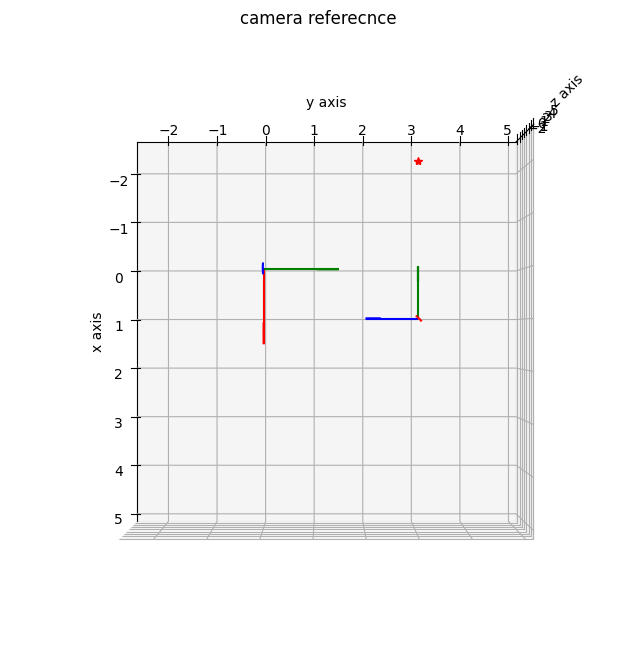

In [ ]:
# Now consider a point (0,3,0) in the camera frame

ptest_c = np.array([0,3,0,1]).reshape(-1,1)

print(ptest_c)

# You can obtain its coordinates in the world frame by
# using directly  the transformation M
ptest_w = np.dot(M,ptest_c)
print(ptest_w)

# or using our function
print(change_cam2world(M,ptest_c))

# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)
# Plotting the test point in the world frame (that corresponds to the matplotlib frame)
axis.plot3D(ptest_w[0,:],ptest_w[1,:],ptest_w[2,:],'*r')


# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)
# Plotting the test point in the world frame (that corresponds to the matplotlib frame)
axis.plot3D(ptest_w[0,:],ptest_w[1,:],ptest_w[2,:],'*r')

axis.view_init(elev=90, azim=0)

# A 3D point to be represented in the world and camera coodinate systems
# Point coordinates in the camera frame
print("3D point in the Camera Frame: \n", ptest_c)
# Point coordinates in the world frame
print("3D point in the World Frame: \n", ptest_w)




translation: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Previous camera 
 [[ 0. -1.  0.  1.]
 [ 0.  0. -1.  3.]
 [ 1.  0.  0.  4.]
 [ 0.  0.  0.  1.]]
Camera after the new translation in th eworld frame 
 [[ 0. -1.  0.  1.]
 [ 0.  0. -1.  6.]
 [ 1.  0.  0.  4.]
 [ 0.  0.  0.  1.]]


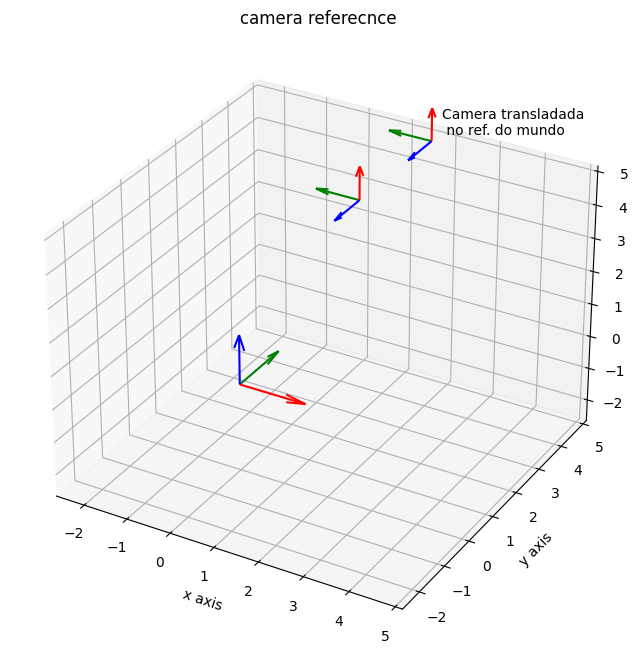

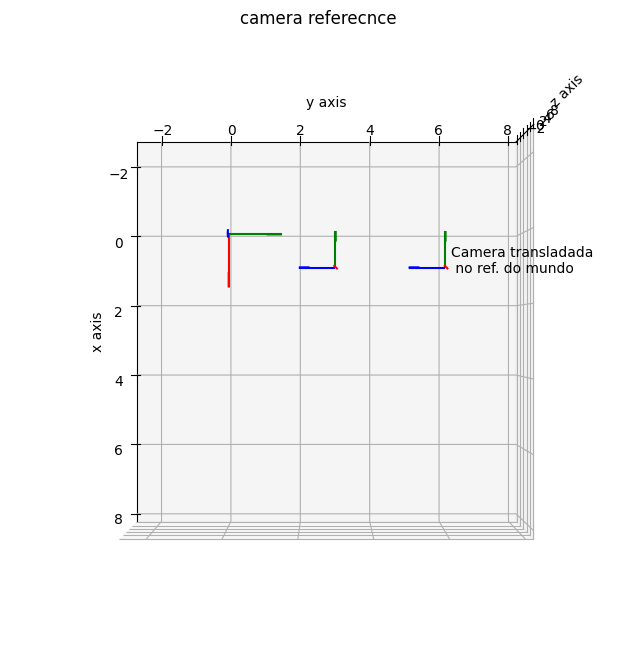

In [ ]:
# Let's translate the camera again in the world frame

T2 = translation(0,3,0)
print("translation: \n",T2)

new_cam2 = np.dot(T2,new_cam)

print("Previous camera \n", new_cam)
print("Camera after the new translation in th eworld frame \n",new_cam2)

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)
#######################
# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam2[:,3],new_cam2[:,0:3],axis,length=1.0)
axis.text(new_cam2[0,3]+.15,new_cam2[1,3]+.15,new_cam2[2,3]+.15, "Camera transladada\n no ref. do mundo")

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,8])
axis = draw_arrows(point,base,axis)
#######################
# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam2[:,3],new_cam2[:,0:3],axis,length=1.0)
axis.text(new_cam2[0,3]+.15,new_cam2[1,3]+.15,new_cam2[2,3]+.15, "Camera transladada\n no ref. do mundo")

axis.view_init(elev=90, azim=0)

[[ 0. -1.  0.  1.]
 [ 0.  0. -1.  3.]
 [ 1.  0.  0.  4.]
 [ 0.  0.  0.  1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


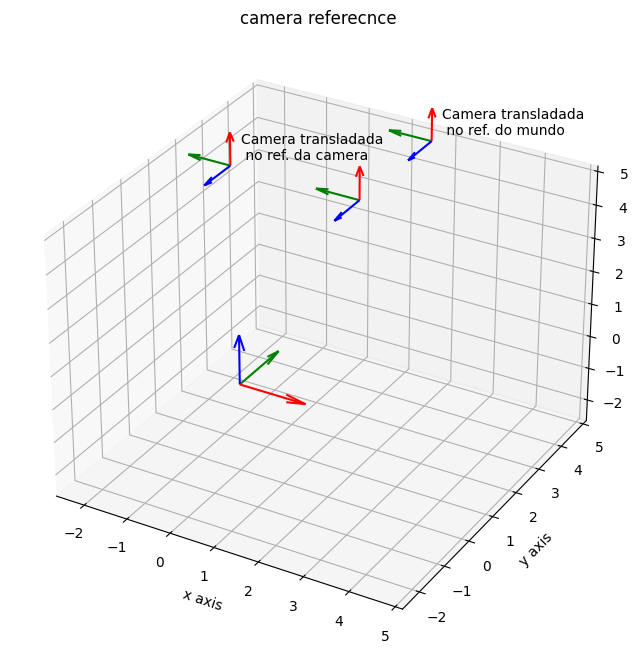

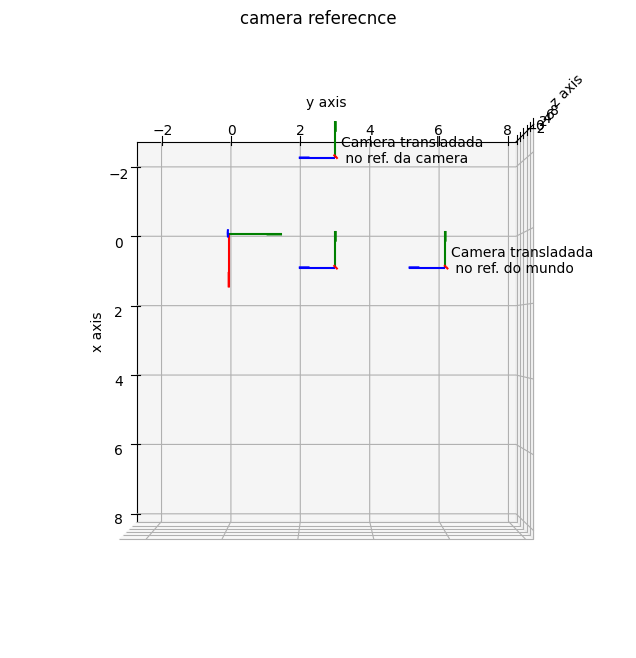

In [ ]:
# Now let's translate the previous camera along its Y-axis
# i.e. in its own reference frame

# To do this, first we have to take the camera back to the origin
# Because we defined the camera initialy aligned with the owrld frame,
# the current camera holds all the accumulated transformations

M = new_cam

M_inv = np.linalg.inv(M)

cam_orig = np.dot(M_inv,new_cam)

print(new_cam)

print(cam_orig)

# Then we perform the desired transformation
T3 = translation(0,3,0)
new_cam3 = np.dot(T3,cam_orig)

# And finally, we add the previous transformations already applied at the
# original camera
new_cam3 = np.dot(M,new_cam3)

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,5])
axis = draw_arrows(point,base,axis)
#######################
# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam2[:,3],new_cam2[:,0:3],axis,length=1.0)
axis.text(new_cam2[0,3]+.15,new_cam2[1,3]+.15,new_cam2[2,3]+.15, "Camera transladada\n no ref. do mundo")

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam3[:,3],new_cam3[:,0:3],axis,length=1.0)
axis.text(new_cam3[0,3]+.15,new_cam3[1,3]+.15,new_cam3[2,3]+.15, "Camera transladada\n no ref. da camera")

######################
# World reference frame plotted at the origin
axis = set_plot(lim=[-2.5,8])
axis = draw_arrows(point,base,axis)
#######################
# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam[:,3],new_cam[:,0:3],axis,length=1.0)

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam2[:,3],new_cam2[:,0:3],axis,length=1.0)
axis.text(new_cam2[0,3]+.15,new_cam2[1,3]+.15,new_cam2[2,3]+.15, "Camera transladada\n no ref. do mundo")

# Plotting the transformed camera reference frame
axis = draw_arrows(new_cam3[:,3],new_cam3[:,0:3],axis,length=1.0)
axis.text(new_cam3[0,3]+.15,new_cam3[1,3]+.15,new_cam3[2,3]+.15, "Camera transladada\n no ref. da camera")


axis.view_init(elev=90, azim=0)